**Different ML Models**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve


In [ ]:
df = pd.read_csv('t_dataset.csv', index_col=False)

Functions for model evaluation

In [ ]:
def evaluate_model(y_test, y_pred, y_pred_prob):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sarcastic', 'Sarcastic'], yticklabels=['Not Sarcastic', 'Sarcastic'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
df['Sarcasm'] = df['Sarcasm'].map({'yes': 1, 'no': 0})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweet'], df['Sarcasm'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Logistic Regression

In [ ]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
y_train = y_train.map({'yes': 1, 'no': 0})

y_pred = model.predict(X_test_tfidf)
y_pred_prob = model.predict_proba(X_test_tfidf)[:, 1]

Accuracy: 78.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       250
           1       0.76      0.91      0.83       347

    accuracy                           0.78       597
   macro avg       0.80      0.76      0.76       597
weighted avg       0.79      0.78      0.77       597



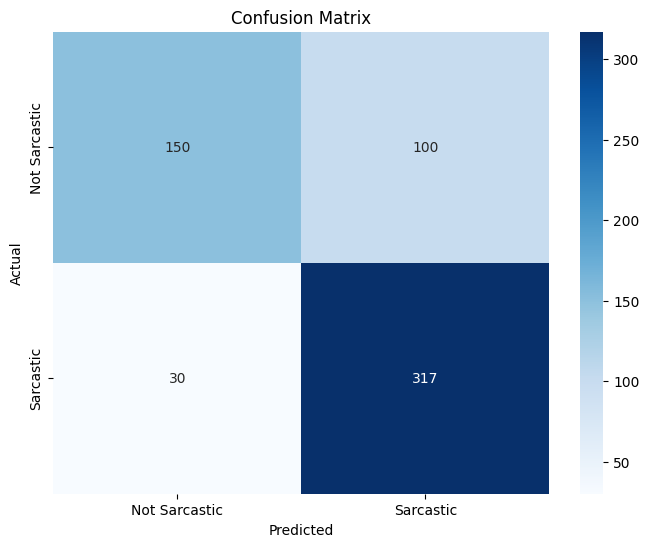

In [ ]:
evaluate_model(y_test, y_pred, y_pred_prob)

Support Vector Machine(SVM)

In [ ]:
# Train SVM model
model = SVC(kernel='linear', probability=True)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 77.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       250
           1       0.76      0.90      0.82       347

    accuracy                           0.78       597
   macro avg       0.79      0.75      0.76       597
weighted avg       0.78      0.78      0.77       597



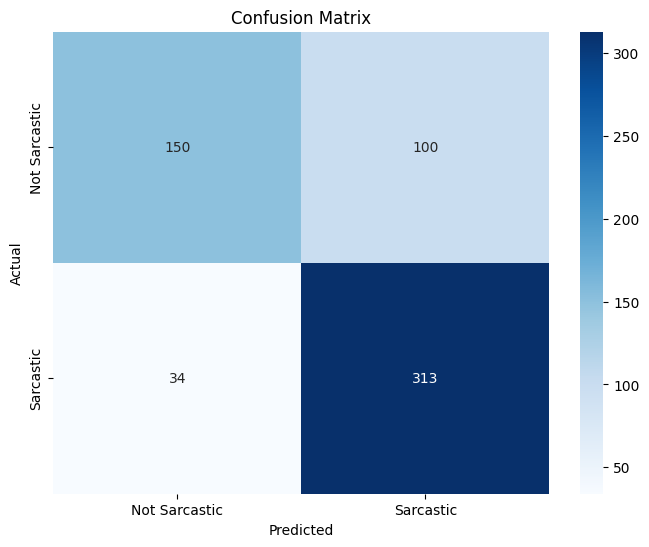

In [ ]:
evaluate_model(y_test, y_pred, y_pred_prob)

Naive Bayes

In [ ]:
# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 77.55%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.69       250
           1       0.76      0.90      0.82       347

    accuracy                           0.78       597
   macro avg       0.79      0.75      0.76       597
weighted avg       0.78      0.78      0.77       597



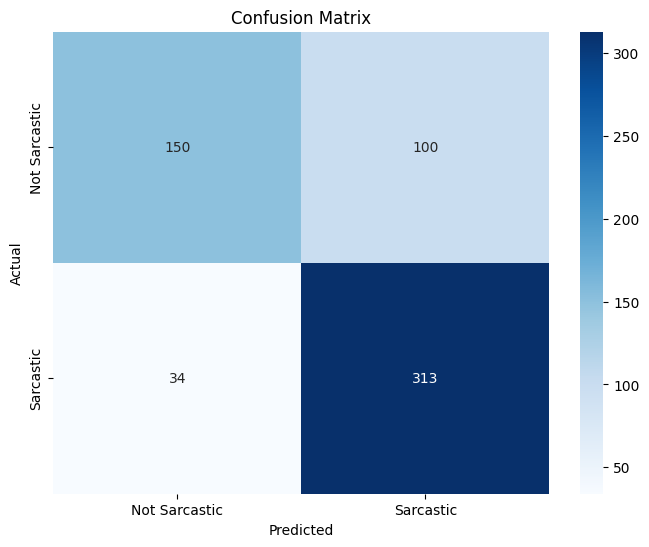

In [ ]:
evaluate_model(y_test, y_pred, y_pred_prob)

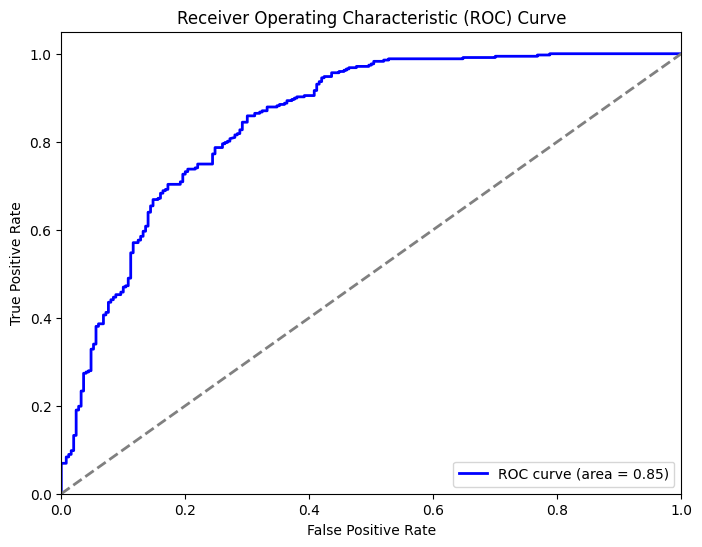

In [ ]:
rocc_curve(y_test, y_pred, y_pred_prob)

Decision Tree

In [ ]:
# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 76.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       250
           1       0.81      0.79      0.80       347

    accuracy                           0.77       597
   macro avg       0.76      0.76      0.76       597
weighted avg       0.77      0.77      0.77       597



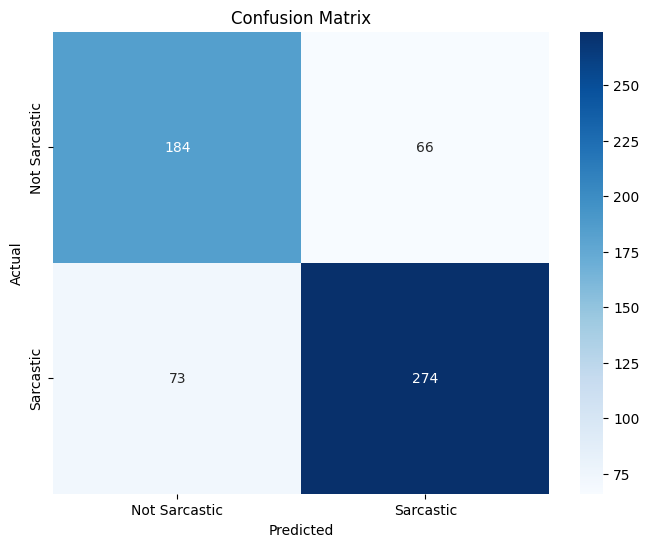

In [ ]:
evaluate_model(y_test, y_pred, y_pred_prob)

K-Nearest Neighbors(KNN)

In [ ]:
# Train KNN model
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

Accuracy: 43.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.99      0.59       250
           1       0.79      0.03      0.06       347

    accuracy                           0.43       597
   macro avg       0.60      0.51      0.33       597
weighted avg       0.63      0.43      0.28       597



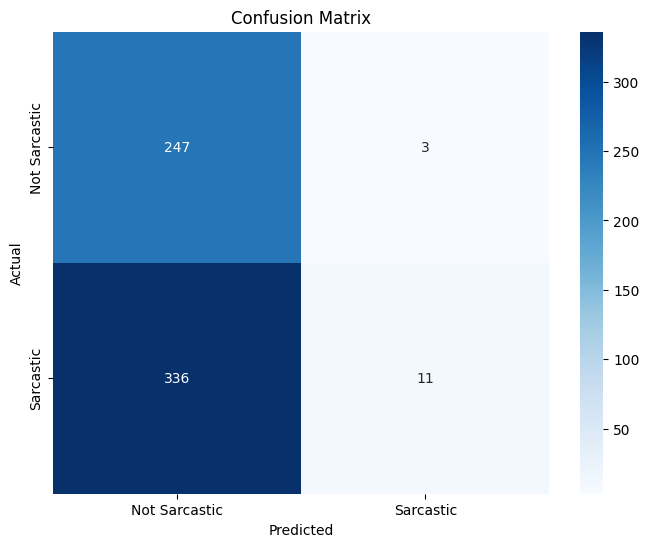

In [ ]:
evaluate_model(y_test, y_pred, y_pred_prob)